Support Vector Machine (SVM) - Key Notes
1. Definition:

SVM is a supervised machine learning algorithm used for classification, regression, and outlier detection.
2. Types of SVM:

Linear SVM: Used when the data is linearly separable, and a straight line (hyperplane) can separate classes.

Non-Linear SVM: Applied when data is not linearly separable, using kernel tricks to transform the data into higher dimensions for linear separation.

3. Key Concepts:

Hyperplane: A decision boundary that separates different classes in the feature space.
Margin: The distance between the hyperplane and the nearest data points (support vectors).
Support Vectors: The data points closest to the hyperplane, which influence the positioning of the hyperplane.


4. Kernel Functions:
Used in non-linear SVM to map data into higher dimensions:

Linear Kernel:
𝐾
(
𝑥
,
𝑦
)
=
𝑥
⋅
𝑦
K(x,y)=x⋅y
Polynomial Kernel:
𝐾
(
𝑥
,
𝑦
)
=
(
𝑥
⋅
𝑦
+
𝑐
)
𝑑
K(x,y)=(x⋅y+c)
d

RBF Kernel:
𝐾
(
𝑥
,
𝑦
)
=
exp
⁡
(
−
𝛾
∣
∣
𝑥
−
𝑦
∣
∣
2
)
K(x,y)=exp(−γ∣∣x−y∣∣
2
 )
Sigmoid Kernel:
𝐾
(
𝑥
,
𝑦
)
=
tanh
⁡
(
𝛼
𝑥
⋅
𝑦
+
𝑐
)
K(x,y)=tanh(αx⋅y+c)

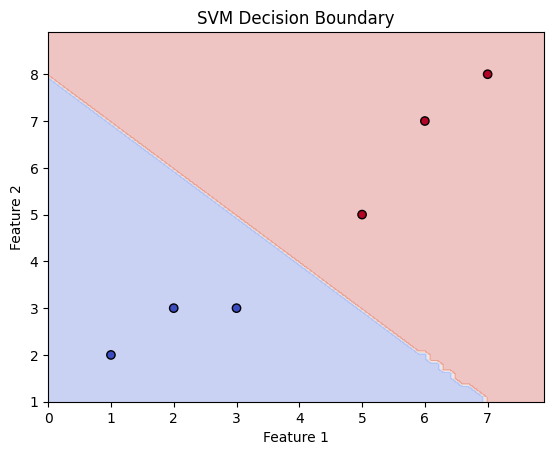

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
X = np.array([[1, 2], [2, 3], [3, 3], [5, 5], [6, 7], [7, 8]])
y = np.array([0, 0, 0, 1, 1, 1])  # Binary classification

# Train SVM classifier
model = SVC(kernel='linear')
model.fit(X, y)

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, model)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



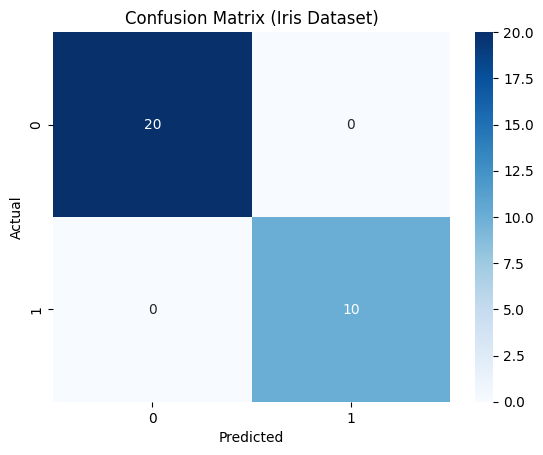

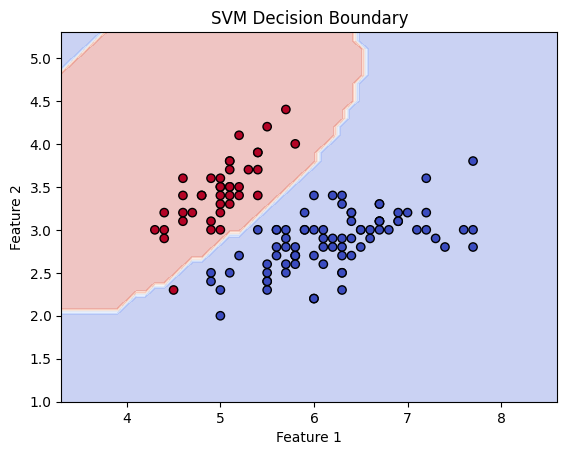

In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only use first two features for visualization
y = iris.target

# Convert to binary classification (setosa vs non-setosa)
y = (y == 0).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize decision boundary
plot_decision_boundary(X_train, y_train, model)


#logistic Regression
About Logistic Regression
1. Definition:

Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical (e.g., 0 or 1, True or False).
It models the probability of the default class (usually labeled as 1) based on input features.

#Introduction to Naive Bayers



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



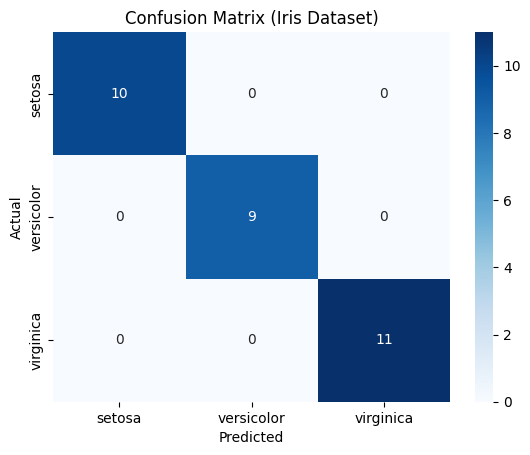

In [ ]:
# Import libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = pd.Series(iris.target)  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


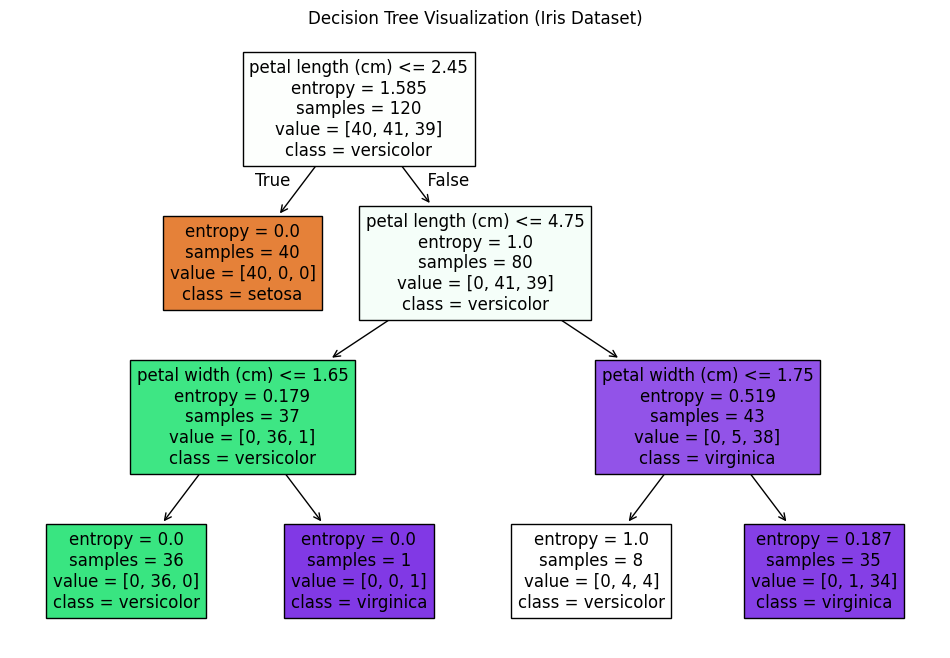


Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



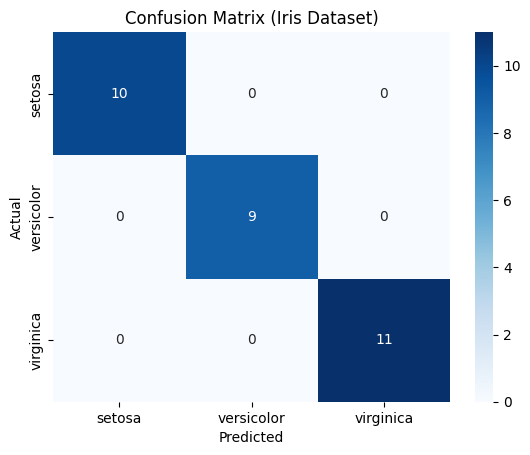

In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text ,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()

# Textual representation of the tree
tree_rules = export_text(model, feature_names=iris.feature_names)
print("\nDecision Tree Rules:\n", tree_rules)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Decision Tree Approach
